Link : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

# Get the data and take a look at it

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Answer some questions using visualizations

## Gender Percentage

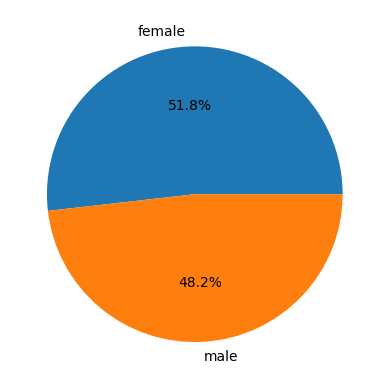

In [26]:
plt.pie(x = df.gender.value_counts(), labels=df.gender.value_counts().index, autopct='%1.1f%%');

## Distribution of math, reading, writing scores

Text(0.5, 1.0, 'writing')

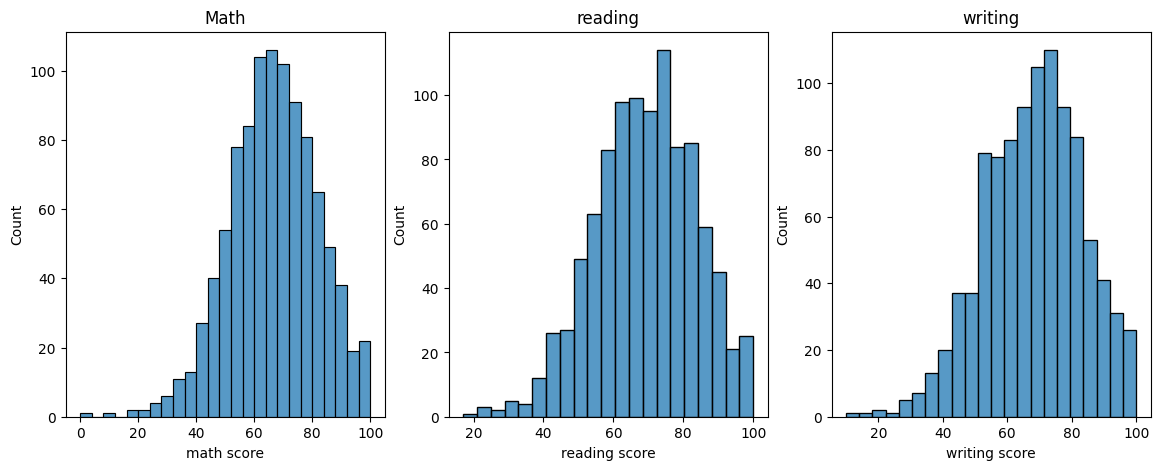

In [29]:
plt.figure(figsize = (14,5))

# First plot, 1 out of 3
plt.subplot(1,3,1)
sns.histplot(x='math score', data= df)
plt.title('Math')


# Second plot
plt.subplot(1,3,2)
sns.histplot(x='reading score', data= df)
plt.title('reading')

# Third plot
plt.subplot(1,3,3)
sns.histplot(x='writing score', data= df)
plt.title('writing')

## Average all scores in one column 'general_score' and compare the performance of different categories


- Try to use df.apply() in order to get the column that represents the average of (math_score + reading_score + writing_score)

In [57]:
df.insert(8, "general_score", (df['math score'] + df['reading score'] + df['writing score']) /3)

In [58]:
#del df["general_score"]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,general_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### General Score per Ethnicity

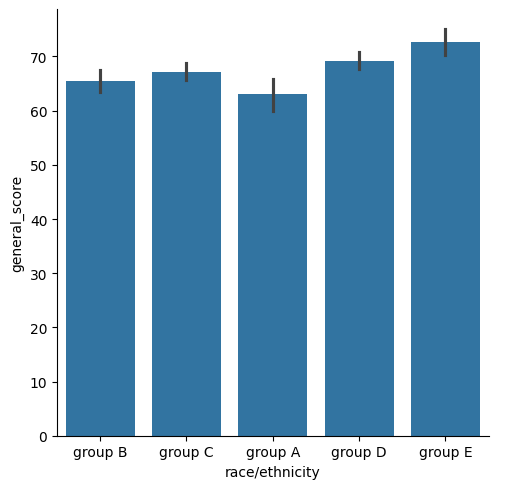

In [90]:
g = sns.catplot(data=df, kind="bar",
    x="race/ethnicity", 
    y="general_score")

### Count of students based on Ethnicity

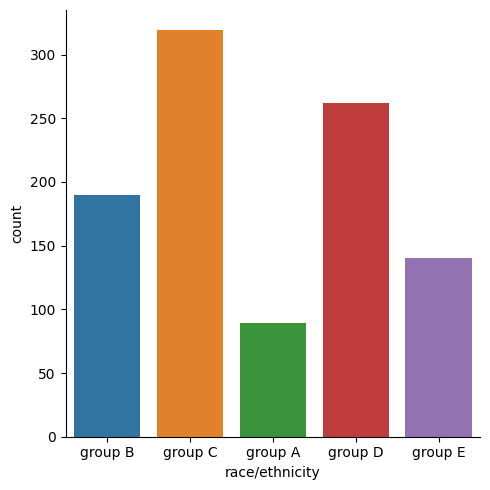

In [69]:
sns.catplot(x = 'race/ethnicity', kind = 'count', hue = 'race/ethnicity', data = df)

### Count the students based on the parental education

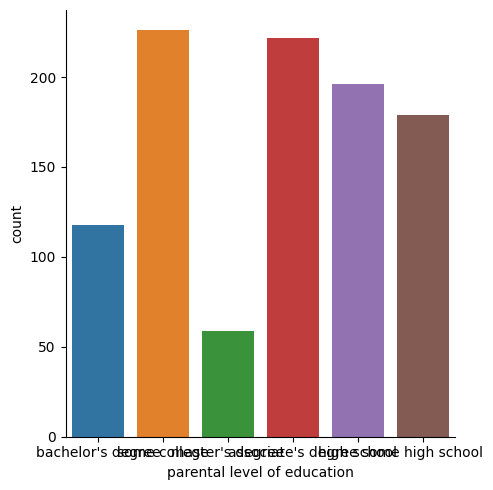

In [70]:
sns.catplot(x = 'parental level of education', kind = 'count', hue = 'parental level of education', data = df)

### General Score based on parental education

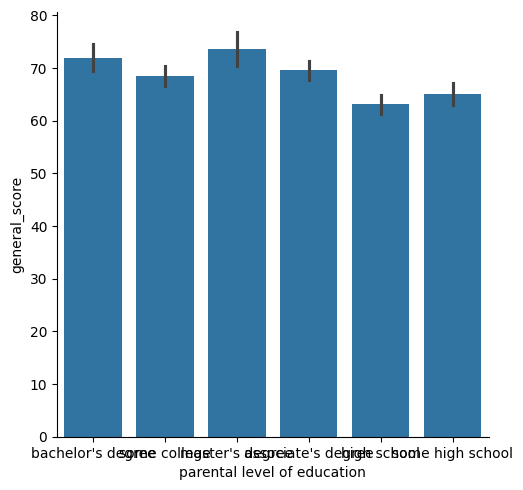

In [91]:
g = sns.catplot(data=df, kind="bar",
    x="parental level of education", 
    y="general_score")

###  Which gender has a better score on average

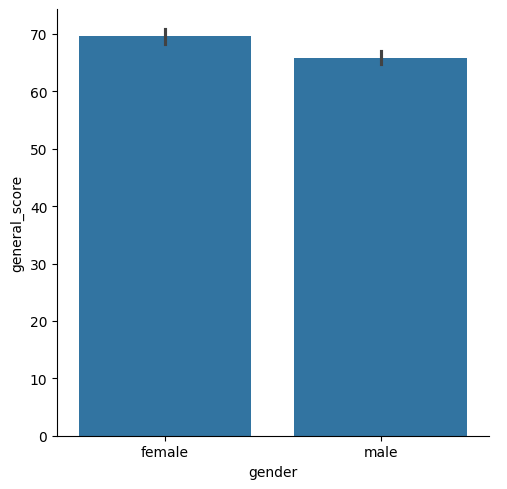

In [89]:
g = sns.catplot(data=df, kind='bar',
    x="gender", 
    y="general_score")

 ### Comparison between genders on every material in one plot (use subplot)

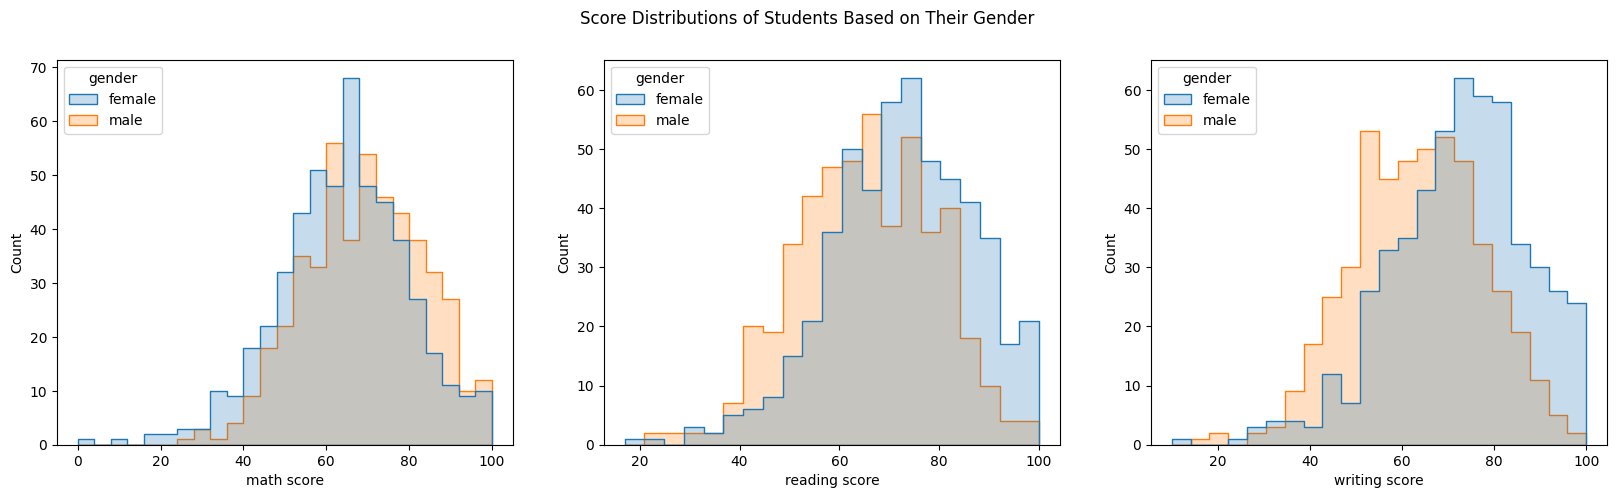

In [73]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Their Gender')

a= sns.histplot(df, x='math score', ax=ax[0], hue='gender', element='step')
b= sns.histplot(df, x='reading score', ax=ax[1], hue='gender', element='step')
c= sns.histplot(df, x='writing score', ax=ax[2], hue='gender', element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

## Box plots

### Destribution of general score based on preparation (show outliers)

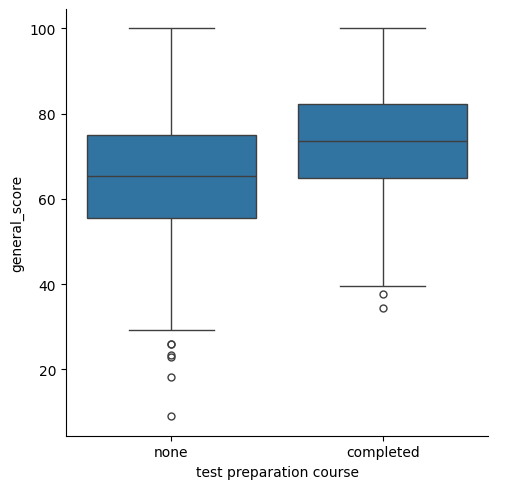

In [99]:
sns.catplot(data=df, x='test preparation course', y='general_score', kind='box')

### Math score based on parental education

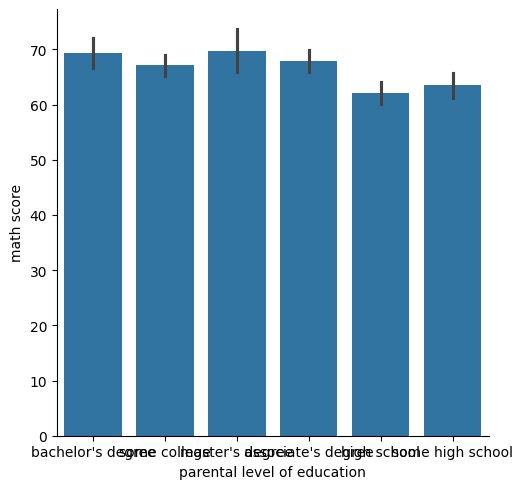

In [101]:
g = sns.catplot(data=df, kind="bar",
    x="parental level of education", 
    y="math score")

## Scatter plot (correlation between math and general score)

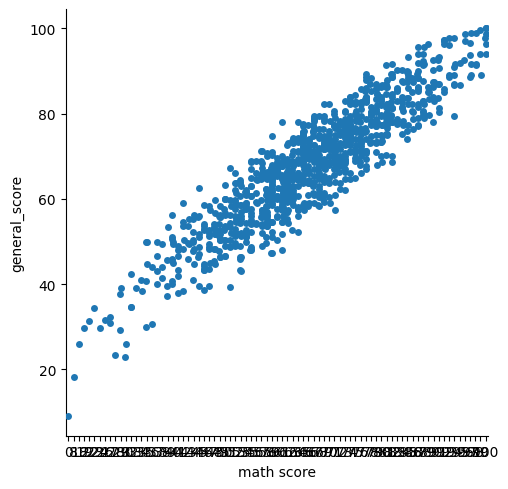

In [97]:
g = sns.catplot(data=df,
    x="math score", 
    y="general_score")

## Facet Grid, show a histogram of general score, breakdown by ethnicity and gender

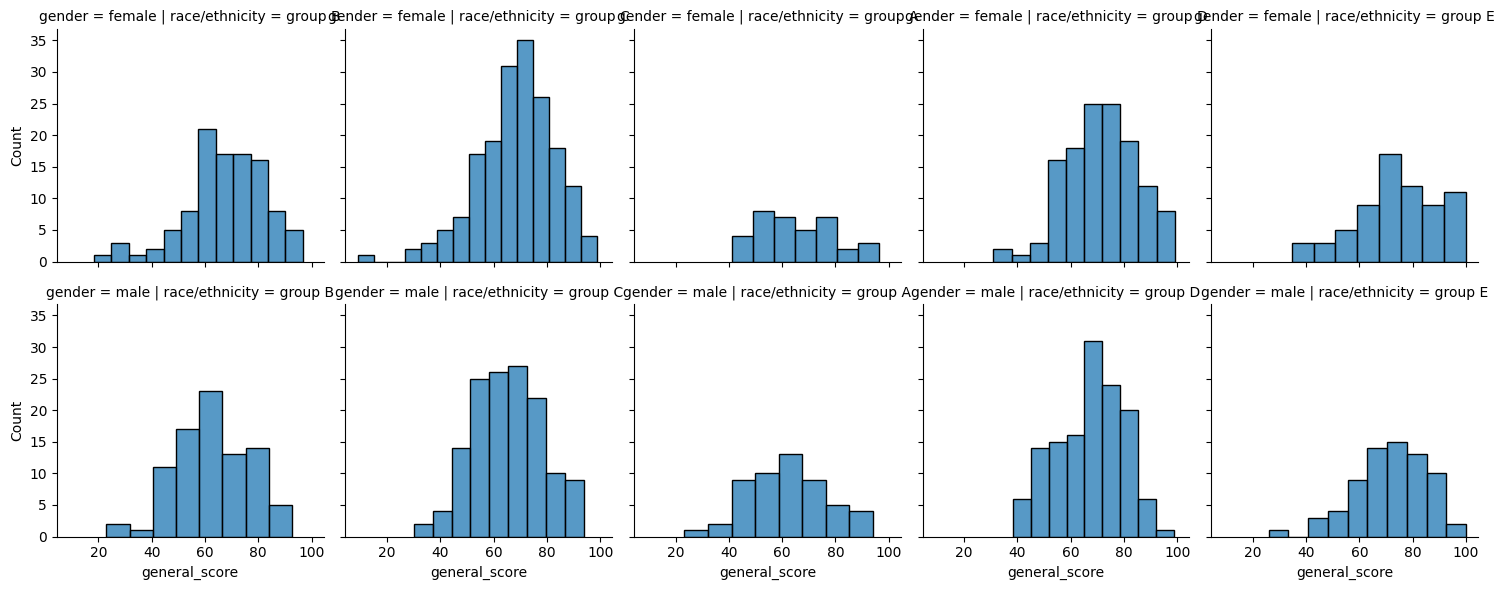

In [104]:
g = sns.FacetGrid(df, col="race/ethnicity", row = 'gender')
g.map(sns.histplot, 'general_score')